In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  mean_absolute_error, mean_absolute_percentage_error

# Ex. 1: Grid search for simple exponential smoothing

In [105]:
draw = pd.read_csv('AlgeriaExport.txt', header = None)
index = pd.date_range(start = "1960", end = "2018", freq = "Y")
T = draw.set_index(index)
T.tail()

,0
2013-12-31,33.209898
2014-12-31,30.219117
2015-12-31,23.171778
2016-12-31,20.860011
2017-12-31,22.638887


### alpha = 0.1

In [106]:
SES = np.array([39.043173, ])
a = 0.1
for i in range(0, 57):
    test = T.iloc[i][0] * a + (1 - a) * SES[i]
    SES = np.append(SES, test)

#convert numpy array to pandas dataframe
RES = pd.DataFrame(SES, columns = ['Exports'])
RES = RES.set_index(index)

#mean squared error
mean_squared_error(T, RES)

77.36791352652219

### alpha = 0.2

In [107]:
SES = np.array([39.043173, ])
a = 0.2
for i in range(0, 57):
    test = T.iloc[i][0] * a + (1 - a) * SES[i]
    SES = np.append(SES, test)

#convert numpy array to pandas dataframe
RES = pd.DataFrame(SES, columns = ['Exports'])
RES = RES.set_index(index)

#mean squared error
mean_squared_error(T, RES)

59.42247580064113

### alpha = 0.6

In [108]:
SES = np.array([39.043173, ])
a = 0.6
for i in range(0, 57):
    test = T.iloc[i][0] * a + (1 - a) * SES[i]
    SES = np.append(SES, test)

#convert numpy array to pandas dataframe
RES = pd.DataFrame(SES, columns = ['Exports'])
RES = RES.set_index(index)

#mean squared error
mean_squared_error(T, RES)

36.22027900901019

### alpha = 0.8

In [109]:
SES = np.array([39.043173, ])
a = 0.8
for i in range(0, 57):
    test = T.iloc[i][0] * a + (1 - a) * SES[i]
    SES = np.append(SES, test)

#convert numpy array to pandas dataframe
RES = pd.DataFrame(SES, columns = ['Exports'])
RES = RES.set_index(index)

#mean squared error
mean_squared_error(T, RES)

34.449856061498686

### alpha = 0.9

In [110]:
SES = np.array([39.043173, ])
a = 0.9
for i in range(0, 57):
    test = T.iloc[i][0] * a + (1 - a) * SES[i]
    SES = np.append(SES, test)

#convert numpy array to pandas dataframe
RES = pd.DataFrame(SES, columns = ['Exports'])
RES = RES.set_index(index)

#mean squared error
mean_squared_error(T, RES)

34.50677286670212

### alpha = 0.85

In [111]:
SES = np.array([39.043173, ])
a = 0.85
for i in range(0, 57):
    test = T.iloc[i][0] * a + (1 - a) * SES[i]
    SES = np.append(SES, test)

#convert numpy array to pandas dataframe
RES = pd.DataFrame(SES, columns = ['Exports'])
RES = RES.set_index(index)

#mean squared error
mean_squared_error(T, RES)

34.40885290732566

### alpha = 0.86

In [112]:
SES = np.array([39.043173, ])
a = 0.86
for i in range(0, 57):
    test = T.iloc[i][0] * a + (1 - a) * SES[i]
    SES = np.append(SES, test)

#convert numpy array to pandas dataframe
RES = pd.DataFrame(SES, columns = ['Exports'])
RES = RES.set_index(index)

#mean squared error
mean_squared_error(T, RES)

34.41744299430257

### alpha = 0.84

In [113]:
SES = np.array([39.043173, ])
a = 0.84
for i in range(0, 57):
    test = T.iloc[i][0] * a + (1 - a) * SES[i]
    SES = np.append(SES, test)

#convert numpy array to pandas dataframe
RES = pd.DataFrame(SES, columns = ['Exports'])
RES = RES.set_index(index)

#mean squared error
mean_squared_error(T, RES)

34.40580621709138

### Statsmodel simple exponential smoothing

In [114]:
fit = SimpleExpSmoothing(T, initialization_method = "estimated").fit()
a = fit.model.params["smoothing_level"]
fcast = fit.forecast(3).rename(r"$\alpha = %s $" % a)

#mean squared error
mean_squared_error(T, fit.fittedvalues)

34.401466385836244

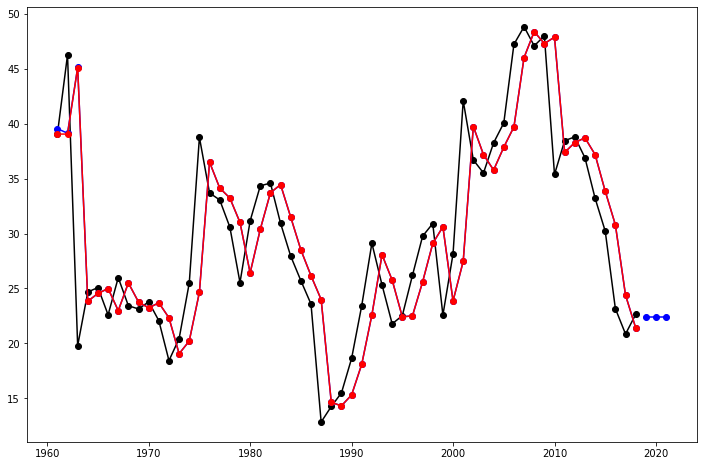

In [115]:
plt.figure(figsize = (12, 8))

#original data
plt.plot(T, marker = "o", color = "black")

#fit 1
plt.plot(fit.fittedvalues, marker = "o", color = "blue")
(line1, ) = plt.plot(fcast, marker = "o", color = "blue")

#my predictions
plt.plot(RES, marker = "o", color = "red")

# Ex. 2: Time series forecasting workflow

In [116]:
df = pd.read_pickle('AlgerianExport.pkl')
df.head()

,0
1960-12-31,39.043173
1961-12-31,46.244557
1962-12-31,19.793873
1963-12-31,24.684682
1964-12-31,25.084059


In [117]:
df.size

58

### Train test split

In [118]:
ncut = int(0.8 * df.size) # 80% for training the rest is withheld for testing
ncut

46

In [119]:
train_data = df.iloc[:ncut]
test_data = df.iloc[ncut:]

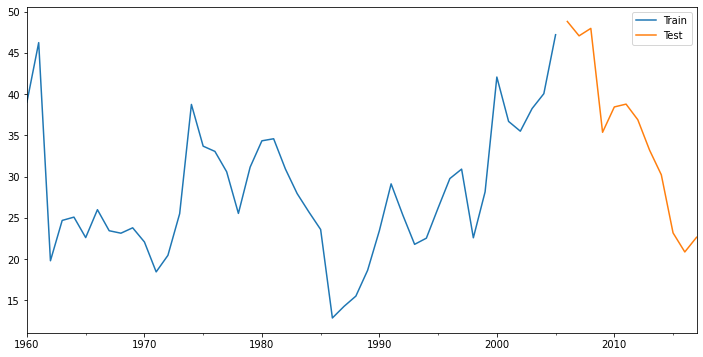

In [125]:
ax = train_data.plot(figsize = (12, 6))
test_data.plot(ax = ax)
plt.legend(['Train', 'Test'])

### Fitting the model

In [121]:
fitted_model = SimpleExpSmoothing(train_data, initialization_method = 'estimated').fit()
test_predictions = fitted_model.forecast(test_data.size).rename('SES forecast')

### Evaluating the model against test data

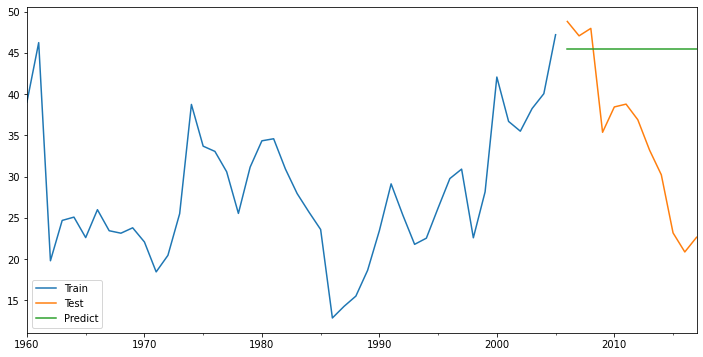

In [127]:
ax = train_data.plot(figsize = (12, 6))
test_data.plot(ax = ax)
test_predictions.plot(ax = ax)
plt.legend(['Train', 'Test', 'Predict'])

In [20]:
# MSE
mean_squared_error(test_data, test_predictions)

192.04697885954042

In [21]:
# check MSE function
np.sum(np.square(np.subtract(test_data[0].values, test_predictions.values))) / test_data.size

192.04697885954042

In [22]:
# MAE
mean_absolute_error(test_data, test_predictions)

11.439488124346497

In [24]:
# MAPE # you must multiply by 100 to get percentage -check!
100 * mean_absolute_percentage_error(test_data, test_predictions)

42.16657213149438

In [26]:
np.sum(np.divide(np.abs(np.subtract(test_data[0].values, test_predictions.values)), test_data[0].values)) / 12

0.42166572131494373

### Forecasting into future

#### Let us assume that the model presented above turned out to be the best. We train the final model using all available data points.

In [27]:
# we use all available data
final_model = SimpleExpSmoothing(df, initialization_method = 'estimated').fit()
forecast = final_model.forecast(test_data.size).rename('forecast')

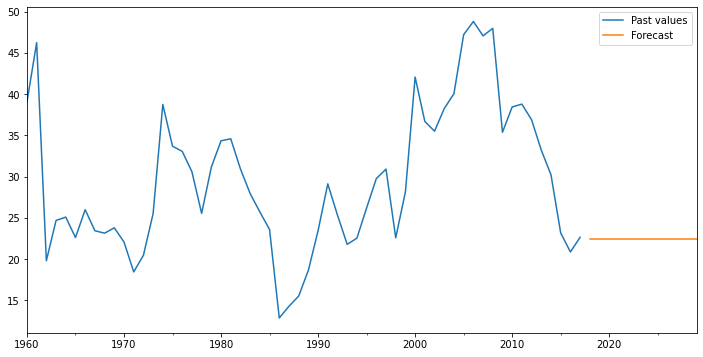

In [128]:
ax = df.plot(figsize = (12, 6))
forecast.plot(ax = ax)
plt.legend(['Past values', 'Forecast'])

# Ex. 3: Holt’s method - double exponential smoothing

### Import

In [130]:
df = pd.read_csv('IBM.csv', index_col = 'Date', parse_dates = True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-02-01,6.978967,7.087317,6.978967,7.068196,1.577107,674670
1962-02-02,7.068196,7.112811,7.036329,7.112811,1.587062,533460
1962-02-05,7.112811,7.112811,6.985341,7.023582,1.567153,329490
1962-02-06,7.023582,7.036329,6.998088,7.029955,1.568787,274575
1962-02-07,7.036329,7.074570,7.036329,7.036329,1.570210,266730
...,...,...,...,...,...,...
1965-12-23,8.022626,8.022626,7.950924,7.950924,1.781072,301248
1965-12-27,7.966858,8.038560,7.966858,7.966858,1.784643,364008
1965-12-28,7.966858,8.002709,7.919057,8.002709,1.792672,382836


### Selecting part of dataframe where long-term linear trend is apparent

In [131]:
cut_l = int(0.19 * len(df))
cut_r = int(0.97 * len(df))
cut_l

187

<AxesSubplot:xlabel='Date'>

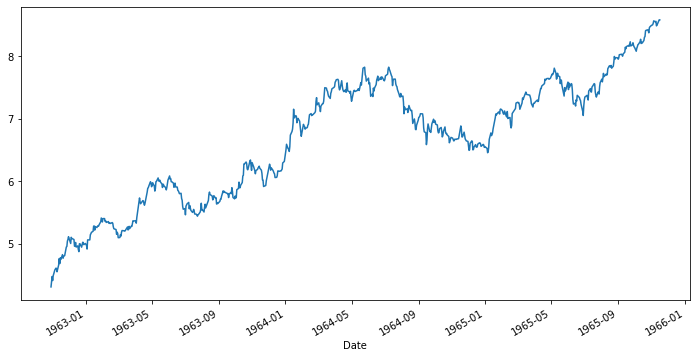

In [132]:
trend = df['Open'].iloc[cut_l:cut_r]
trend.plot(figsize = (12, 6))

### Set the frequency of the time series to business days

In [133]:
trend.head(20)

Date
1962-10-29    4.308477
1962-10-30    4.391332
1962-10-31    4.474187
1962-11-01    4.410453
1962-11-02    4.486934
1962-11-05    4.579350
1962-11-07    4.608031
1962-11-08    4.604844
1962-11-09    4.550669
1962-11-12    4.659018
1962-11-13    4.760994
1962-11-14    4.681326
1962-11-15    4.773741
1962-11-16    4.748247
1962-11-19    4.824729
1962-11-20    4.767368
1962-11-21    4.797642
1962-11-23    4.808795
1962-11-26    4.945825
1962-11-27    4.955386
Name: Open, dtype: float64

In [134]:
trend = trend.asfreq('b')
trend.head(20)

Date
1962-10-29    4.308477
1962-10-30    4.391332
1962-10-31    4.474187
1962-11-01    4.410453
1962-11-02    4.486934
1962-11-05    4.579350
1962-11-06         NaN
1962-11-07    4.608031
1962-11-08    4.604844
1962-11-09    4.550669
1962-11-12    4.659018
1962-11-13    4.760994
1962-11-14    4.681326
1962-11-15    4.773741
1962-11-16    4.748247
1962-11-19    4.824729
1962-11-20    4.767368
1962-11-21    4.797642
1962-11-22         NaN
1962-11-23    4.808795
Freq: B, Name: Open, dtype: float64

### We find NaN's because the original data is missing some of those days (for example 1962-11-06)

### Use forward fill to remove nans

In [135]:
trend = trend.ffill(axis = 0)
trend.head(20)

Date
1962-10-29    4.308477
1962-10-30    4.391332
1962-10-31    4.474187
1962-11-01    4.410453
1962-11-02    4.486934
1962-11-05    4.579350
1962-11-06    4.579350
1962-11-07    4.608031
1962-11-08    4.604844
1962-11-09    4.550669
1962-11-12    4.659018
1962-11-13    4.760994
1962-11-14    4.681326
1962-11-15    4.773741
1962-11-16    4.748247
1962-11-19    4.824729
1962-11-20    4.767368
1962-11-21    4.797642
1962-11-22    4.797642
1962-11-23    4.808795
Freq: B, Name: Open, dtype: float64

### Splitting data into train and test parts

In [136]:
ncut = int(0.8 * len(trend))
ncut

637

In [137]:
train_data = trend.iloc[:ncut]
test_data = trend.iloc[ncut:]

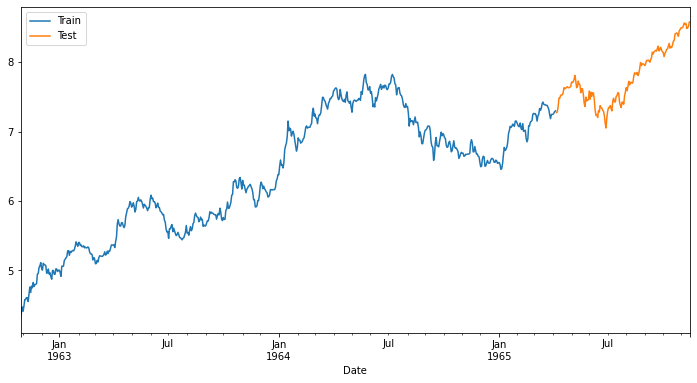

In [140]:
ax = train_data.plot(figsize = (12, 6))
test_data.plot(ax = ax)
plt.legend(['Train', 'Test'])

### Simple Exponential Smoothing

In [141]:
fit_Simple = SimpleExpSmoothing(train_data).fit()
fcast_Simple = fit_Simple.forecast(len(test_data)).rename("SimpleExpSmoothing")

### Holt's model

In [142]:
fit_Holt = Holt(train_data, exponential = False).fit()
fcast_Holt = fit_Holt.forecast(len(test_data)).rename("Holt's model")

### Plotting both predictions

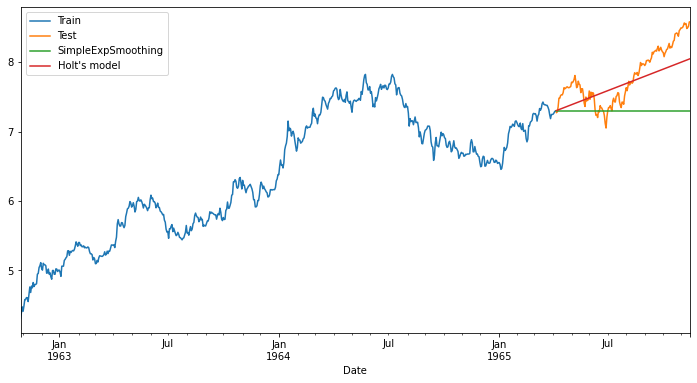

In [143]:
ax = train_data.plot(figsize = (12, 6))
test_data.plot(ax = ax)
fcast_Simple.plot(ax = ax)
fcast_Holt.plot(ax = ax)
plt.legend(["Train", "Test", "SimpleExpSmoothing", "Holt's model"])

### Comparing mean square error

In [146]:
#Simple exponential smoothing
print(mean_squared_error(test_data, fcast_Simple))

#Holt's method
print(mean_squared_error(test_data, fcast_Holt))

0.3981700493887258
0.07441559337618535
